# Anomaly Detection Benchmark with Classical Architectures

## Importing Class and Module

In [11]:
import numpy as np
import gdown
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from matplotlib import pyplot as plt
import functions.AD_preprocessing as preprocessing
import functions.AD_utilities as utilities
import functions.AD_detection as detection
import functions.AD_training as training

## Artificial Dataset

In [3]:
seed = 50
np.random.seed(seed)

dataset_test, _ = preprocessing.generate_dataset(
        normal_sample_type='uniform',
        normal_sample_params={'low': 1, 'high': 2, 'size': 50},
        outlier_sample_type='uniform',
        outlier_sample_params={'low': 5, 'high': 8, 'size': 5}
    )

times = np.array([t for t, _ in dataset_test])
values = np.array([v for _, v in dataset_test])

Anomalies detected with isolation forest: 6
Anomalies timestamps: [ 6 10 23 24 31 43]


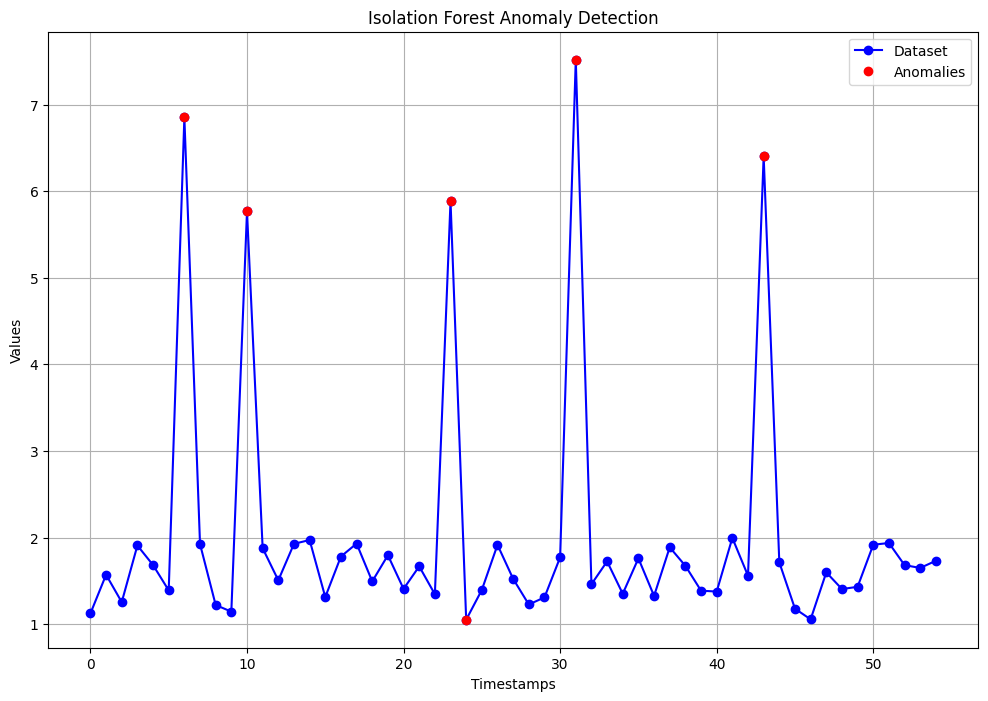

In [4]:
isolation_forest = IsolationForest(contamination=0.1, random_state=seed)
preds_iforest = isolation_forest.fit_predict(values.reshape(-1, 1))

anomalies_iforest = times[preds_iforest == -1]
print(f"Anomalies detected with isolation forest: {len(anomalies_iforest)}")
print("Anomalies timestamps:", anomalies_iforest)


def plot_isolation_forest_results(times, values, anomalies, title="Isolation Forest Anomaly Detection"):
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(times, values, 'bo-', label='Dataset')

    ax.plot(anomalies, values[np.isin(times, anomalies)], 'ro', label='Anomalies')

    ax.set_title(title)
    ax.set_xlabel("Timestamps")
    ax.set_ylabel("Values")
    ax.legend()
    plt.grid(True)
    plt.show()

plot_isolation_forest_results(times, values, anomalies_iforest)

Anomalies detected with DBSCAN: 5
Anomalies timestamps: [ 6 10 23 31 43]


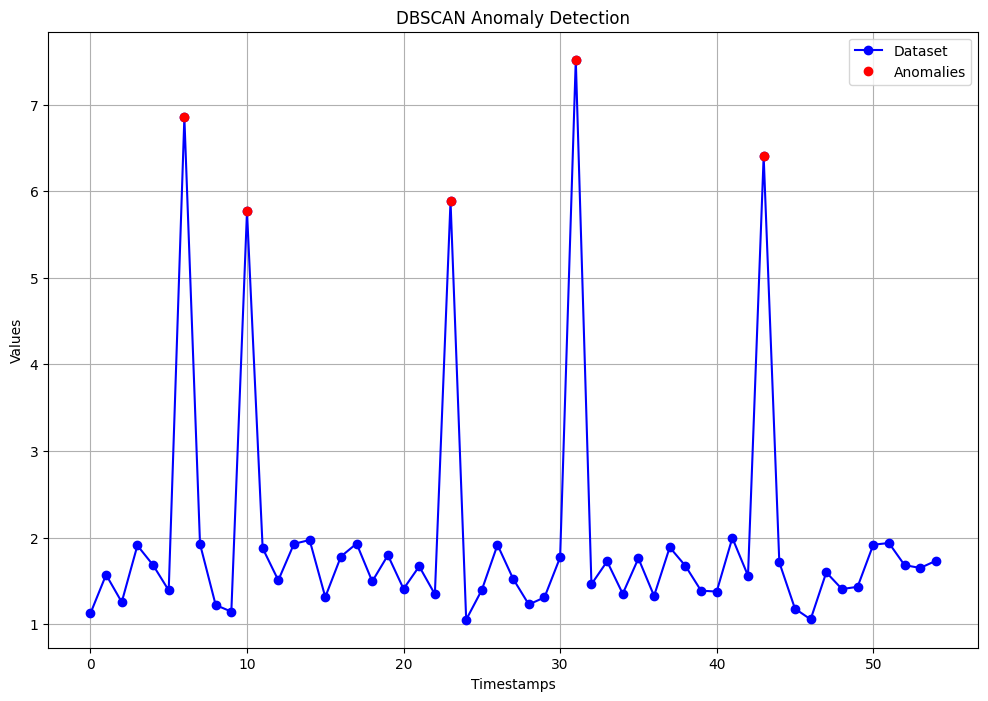

In [5]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
preds_dbscan = dbscan.fit_predict(values.reshape(-1, 1))

anomalies_dbscan = times[preds_dbscan == -1]
print(f"Anomalies detected with DBSCAN: {len(anomalies_dbscan)}")
print("Anomalies timestamps:", anomalies_dbscan)

plot_isolation_forest_results(times, values, anomalies_dbscan, title="DBSCAN Anomaly Detection")

Anomalies detected with LOF: 6
Anomalies timestamps: [ 6 10 23 24 31 43]


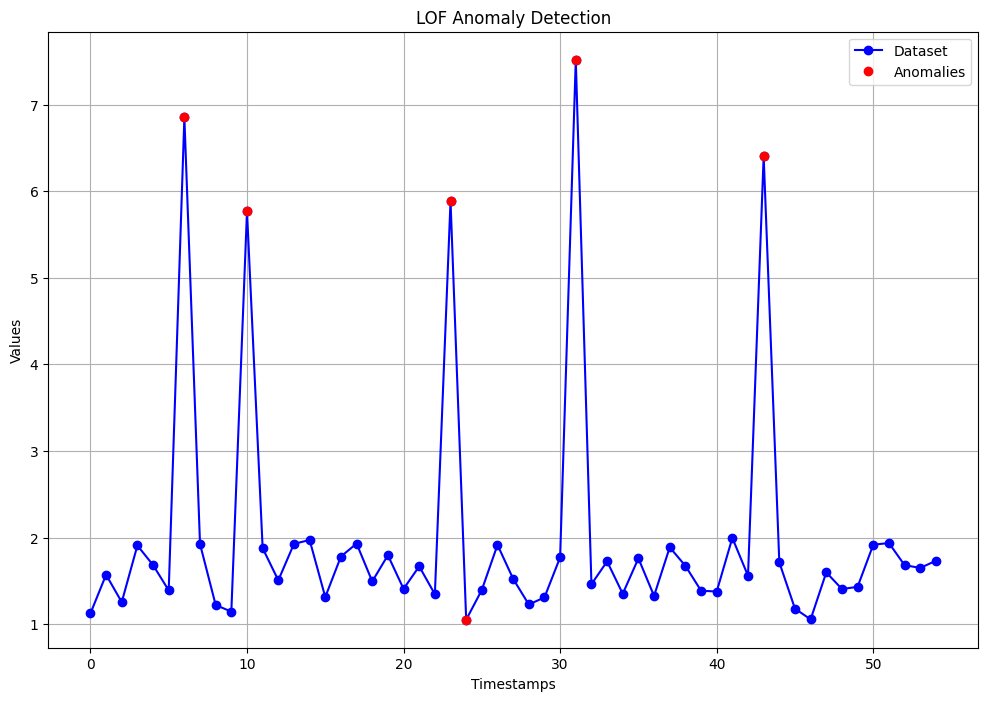

In [6]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
preds_lof = lof.fit_predict(values.reshape(-1, 1))

anomalies_lof = times[preds_lof == -1]
print(f"Anomalies detected with LOF: {len(anomalies_lof)}")
print("Anomalies timestamps:", anomalies_lof)

plot_isolation_forest_results(times, values, anomalies_lof, title="LOF Anomaly Detection")

Anomalies detected with OCSVM: 6
Anomalies timestamps: [ 0  6 10 24 31 46]


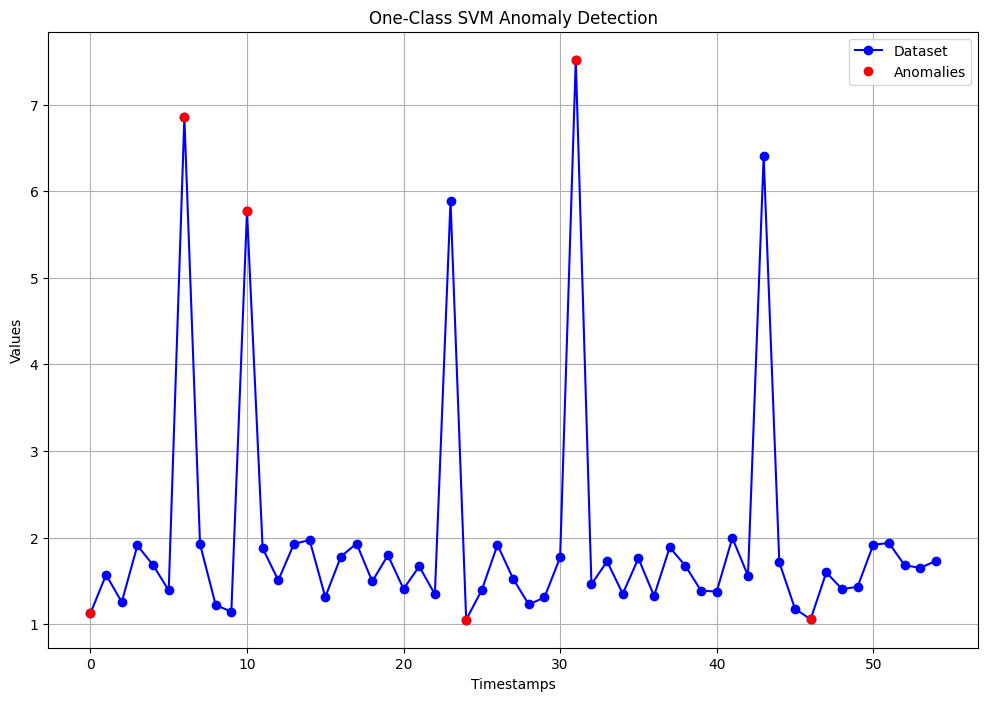

In [7]:
ocsvm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.1)
preds_ocsvm = ocsvm.fit_predict(values.reshape(-1, 1))

anomalies_ocsvm = times[preds_ocsvm == -1]
print(f"Anomalies detected with OCSVM: {len(anomalies_ocsvm)}")
print("Anomalies timestamps:", anomalies_ocsvm)

plot_isolation_forest_results(times, values, anomalies_ocsvm, title="One-Class SVM Anomaly Detection")

## Real-world Dataset

In [12]:
file_id = '17n3TwoVkNSecnpWk9jwMIOVW0uQWGi-7' #dataset temperature esterne (in realta cpu??) ok
# file_id = '1vg1hKPytYlOol7LHbVZA9dsWKpQ2N0u0' #dataset cpu utilization 5f5533  ok
# file_id = '1Wh7iYN2fpxj8UCPoch4veHdDdX0YUIP3' #dataset rds cpu utilization e47b
# file_id = '1dA7rxO1O2EXjSxzw3amUJyrC04cR741K'  # dataset ambient system failure t



# url = f'https://drive.google.com/uc?id={file_id}' #dataset temperature esterne (in realta cpu??)
# url = f'https://drive.google.com/uc?id={file_id}' #dataset cpu utilization 5f5533
url = f'https://drive.google.com/uc?id={file_id}' #dataset rds cpu utilization e47b

print(f"Downloading the file from: {url}")


# output = 'ec2_cpu_utilization_24ae8d.csv' #dataset temperature esterne (in realta cpu??)
# output = 'ec2_cpu_utilization_new.csv' #dataset cpu utilization 5f5533
output = 'new_dataset.csv' #dataset rds cpu utilization e47b

print(f"Loading the dataset from: {output}")

gdown.download(url, output, quiet=False)

dataset, original_times = preprocessing.load_dataset_from_csv(output, 'timestamp', 'value')

Loading the dataset from: new_dataset.csv


Downloading...
From: https://drive.google.com/uc?id=17n3TwoVkNSecnpWk9jwMIOVW0uQWGi-7
To: C:\Users\marco\Desktop\Dottorato\Tesi\codice\new_dataset.csv
100%|██████████| 105k/105k [00:00<00:00, 5.07MB/s]


In [14]:
dataset_test, test_times = preprocessing.load_partial_dataset_from_csv(output, 'timestamp', 'value', 50, 100)

dataset_test_scaled = preprocessing.scale_dataset(dataset_test)

In [17]:
seed= 50
np.random.seed(seed)

dataset_test, test_times = preprocessing.load_partial_dataset_from_csv(output, 'timestamp', 'value', 50, 100)

dataset_test_scaled = preprocessing.scale_dataset(dataset_test)

# times = np.array([t for t, _ in dataset_test])
# values = np.array([v for _, v in dataset_test])

times = np.array([t for t, _ in dataset_test_scaled])
values = np.array([v for _, v in dataset_test_scaled])

Anomalies detected with isolation forest: 12
Anomalies timestamps: [ 4  8 11 14 16 20 22 26 32 37 42 47]


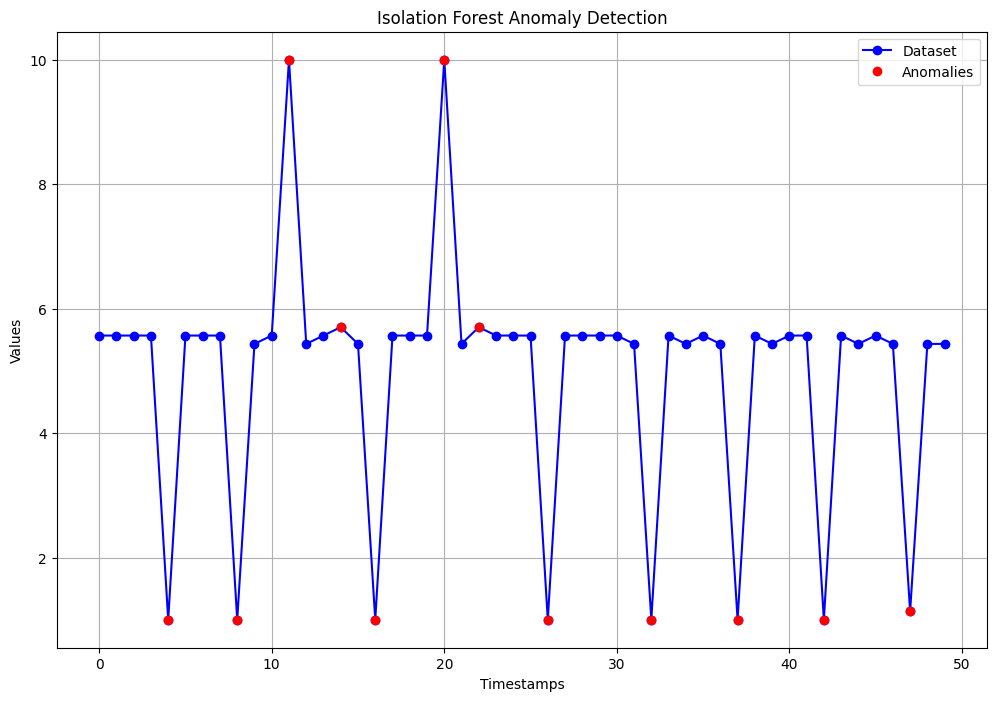

In [18]:
isolation_forest = IsolationForest(
    contamination=0.25,
    n_estimators=200,
    max_samples='auto',
    random_state=seed
)

preds_iforest = isolation_forest.fit_predict(values.reshape(-1, 1))

anomalies_iforest = times[preds_iforest == -1]
print(f"Anomalies detected with isolation forest: {len(anomalies_iforest)}")
print("Anomalies timestamps:", anomalies_iforest)

plot_isolation_forest_results(times, values, anomalies_iforest)

Anomalies detected with DBSCAN: 10
Anomalies timestamps: [ 4  8 11 16 20 26 32 37 42 47]


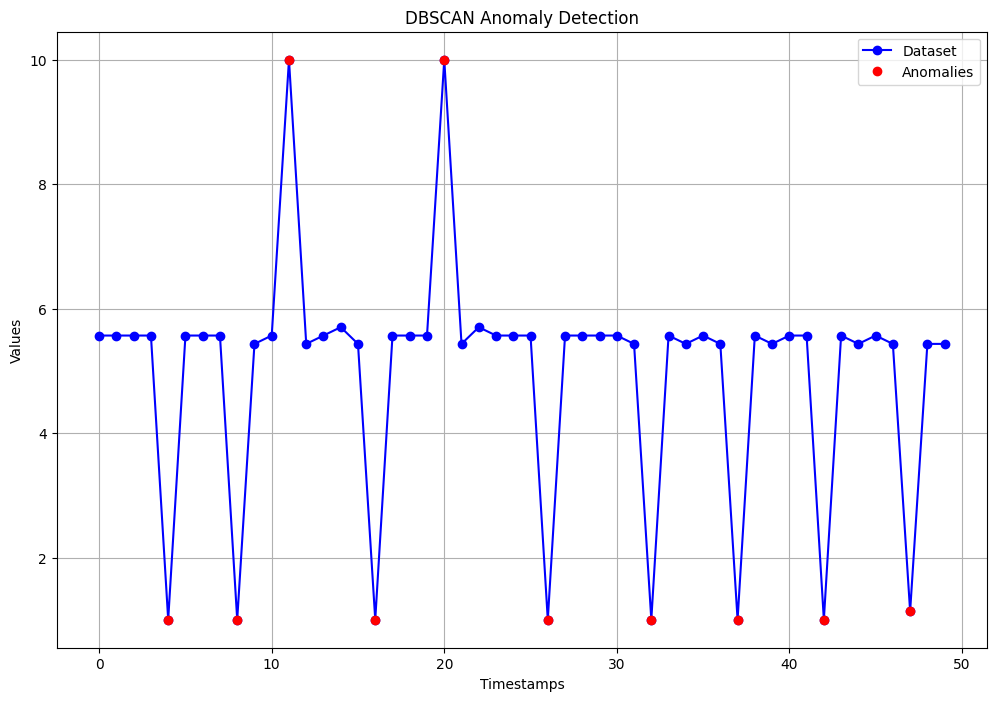

In [19]:
# Applica DBSCAN soluzione migliore per eps=0.15 e min_samples=3
dbscan = DBSCAN(eps=0.2, min_samples=9)
preds_dbscan = dbscan.fit_predict(values.reshape(-1, 1))

anomalies_dbscan = times[preds_dbscan == -1]
print(f"Anomalies detected with DBSCAN: {len(anomalies_dbscan)}")
print("Anomalies timestamps:", anomalies_dbscan)

plot_isolation_forest_results(times, values, anomalies_dbscan, title="DBSCAN Anomaly Detection")

Anomalies detected with LOF: 10
Anomalies timestamps: [ 4  8 11 16 20 26 32 37 42 47]


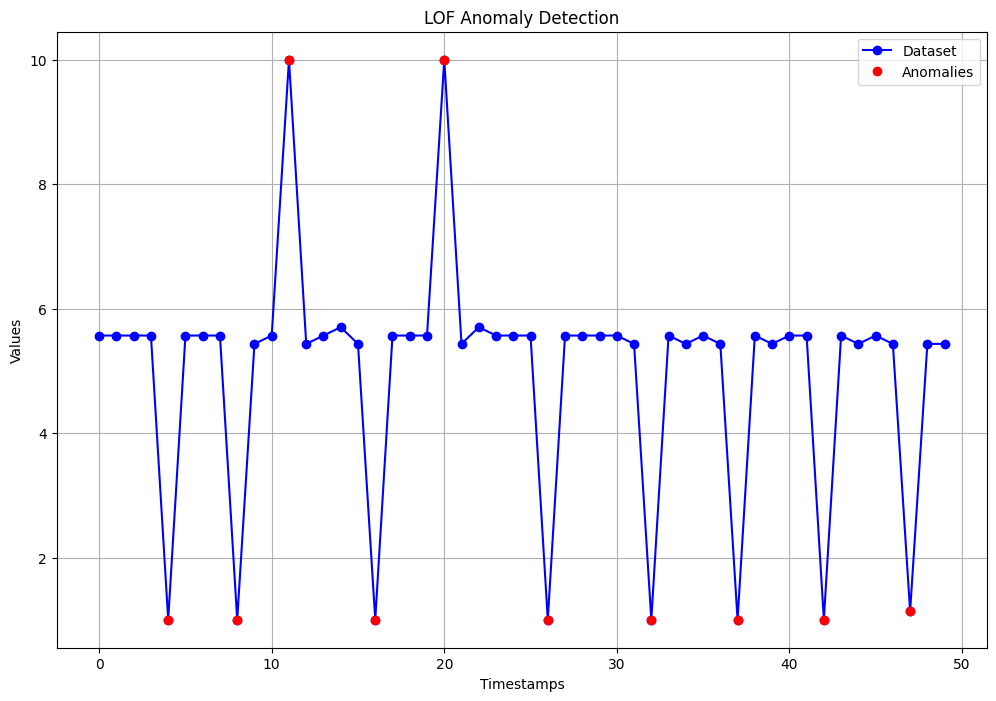

In [20]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.2, leaf_size=30, metric='euclidean') # default metric is manhattan
preds_lof = lof.fit_predict(values.reshape(-1, 1))

anomalies_lof = times[preds_lof == -1]
print(f"Anomalies detected with LOF: {len(anomalies_lof)}")
print("Anomalies timestamps:", anomalies_lof)

plot_isolation_forest_results(times, values, anomalies_lof, title="LOF Anomaly Detection")


Anomalies detected with OCSVM: 24
Anomalies timestamps: [ 4  8  9 11 12 14 15 16 20 21 22 26 31 32 34 36 37 39 42 44 46 47 48 49]


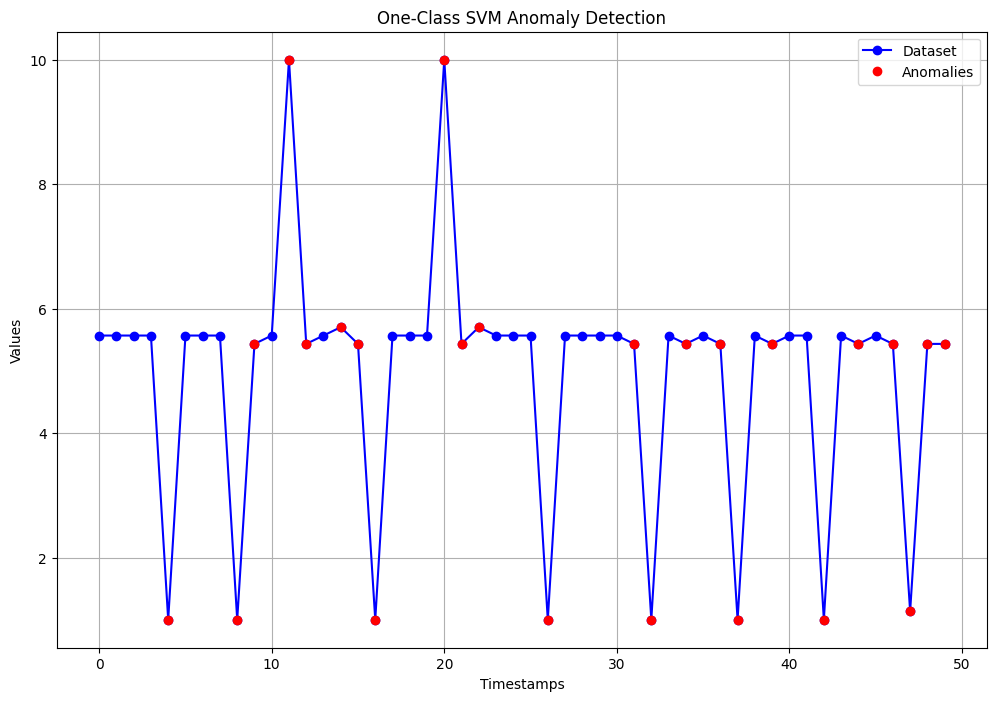

In [21]:
ocsvm = OneClassSVM(kernel='rbf', gamma=1.3, nu=0.65)
preds_ocsvm = ocsvm.fit_predict(values.reshape(-1, 1))

anomalies_ocsvm = times[preds_ocsvm == -1]
print(f"Anomalies detected with OCSVM: {len(anomalies_ocsvm)}")
print("Anomalies timestamps:", anomalies_ocsvm)

plot_isolation_forest_results(times, values, anomalies_ocsvm, title="One-Class SVM Anomaly Detection")